**Import Libraries & Read Data**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk
from sklearn.pipeline import Pipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Tweets.csv', usecols=['airline_sentiment', 'text'])
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


**Data Exploration**

In [3]:
#Shape Of Data
data.shape

(14640, 2)

In [4]:
#Info Of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [5]:
#NULL Data
data.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

In [6]:
data.describe(include='object').transpose()

,count,unique,top,freq
airline_sentiment,14640,3,negative,9178
text,14640,14427,@united thanks,6


In [7]:
data[data.duplicated(keep=False)]

,airline_sentiment,text
14,positive,@VirginAmerica Thanks!
331,positive,@VirginAmerica Thanks!
504,positive,@united thanks
515,positive,@united thanks
867,positive,@united thank you.
...,...,...
13995,negative,@AmericanAir 800 number will not even let you...
14386,negative,@AmericanAir I want to speak to a human being!...
14392,negative,@AmericanAir no response to DM or email yet. ...
14543,negative,@AmericanAir should reconsider #usairways acqu...


In [8]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

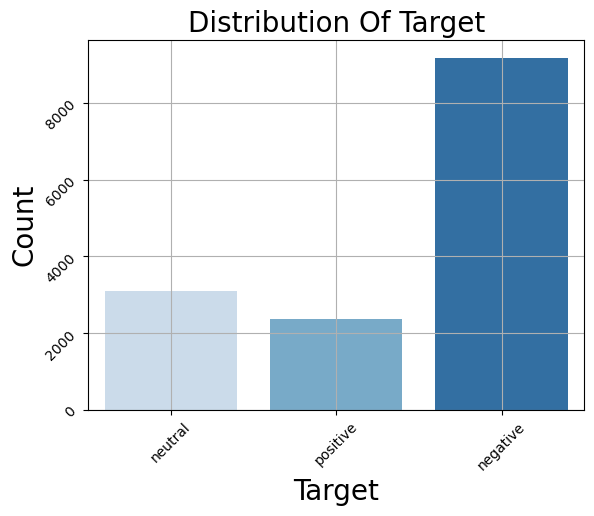

In [9]:
sns.countplot(x='airline_sentiment',data=data,palette='Blues')
plt.title('Distribution Of Target',fontsize=20)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

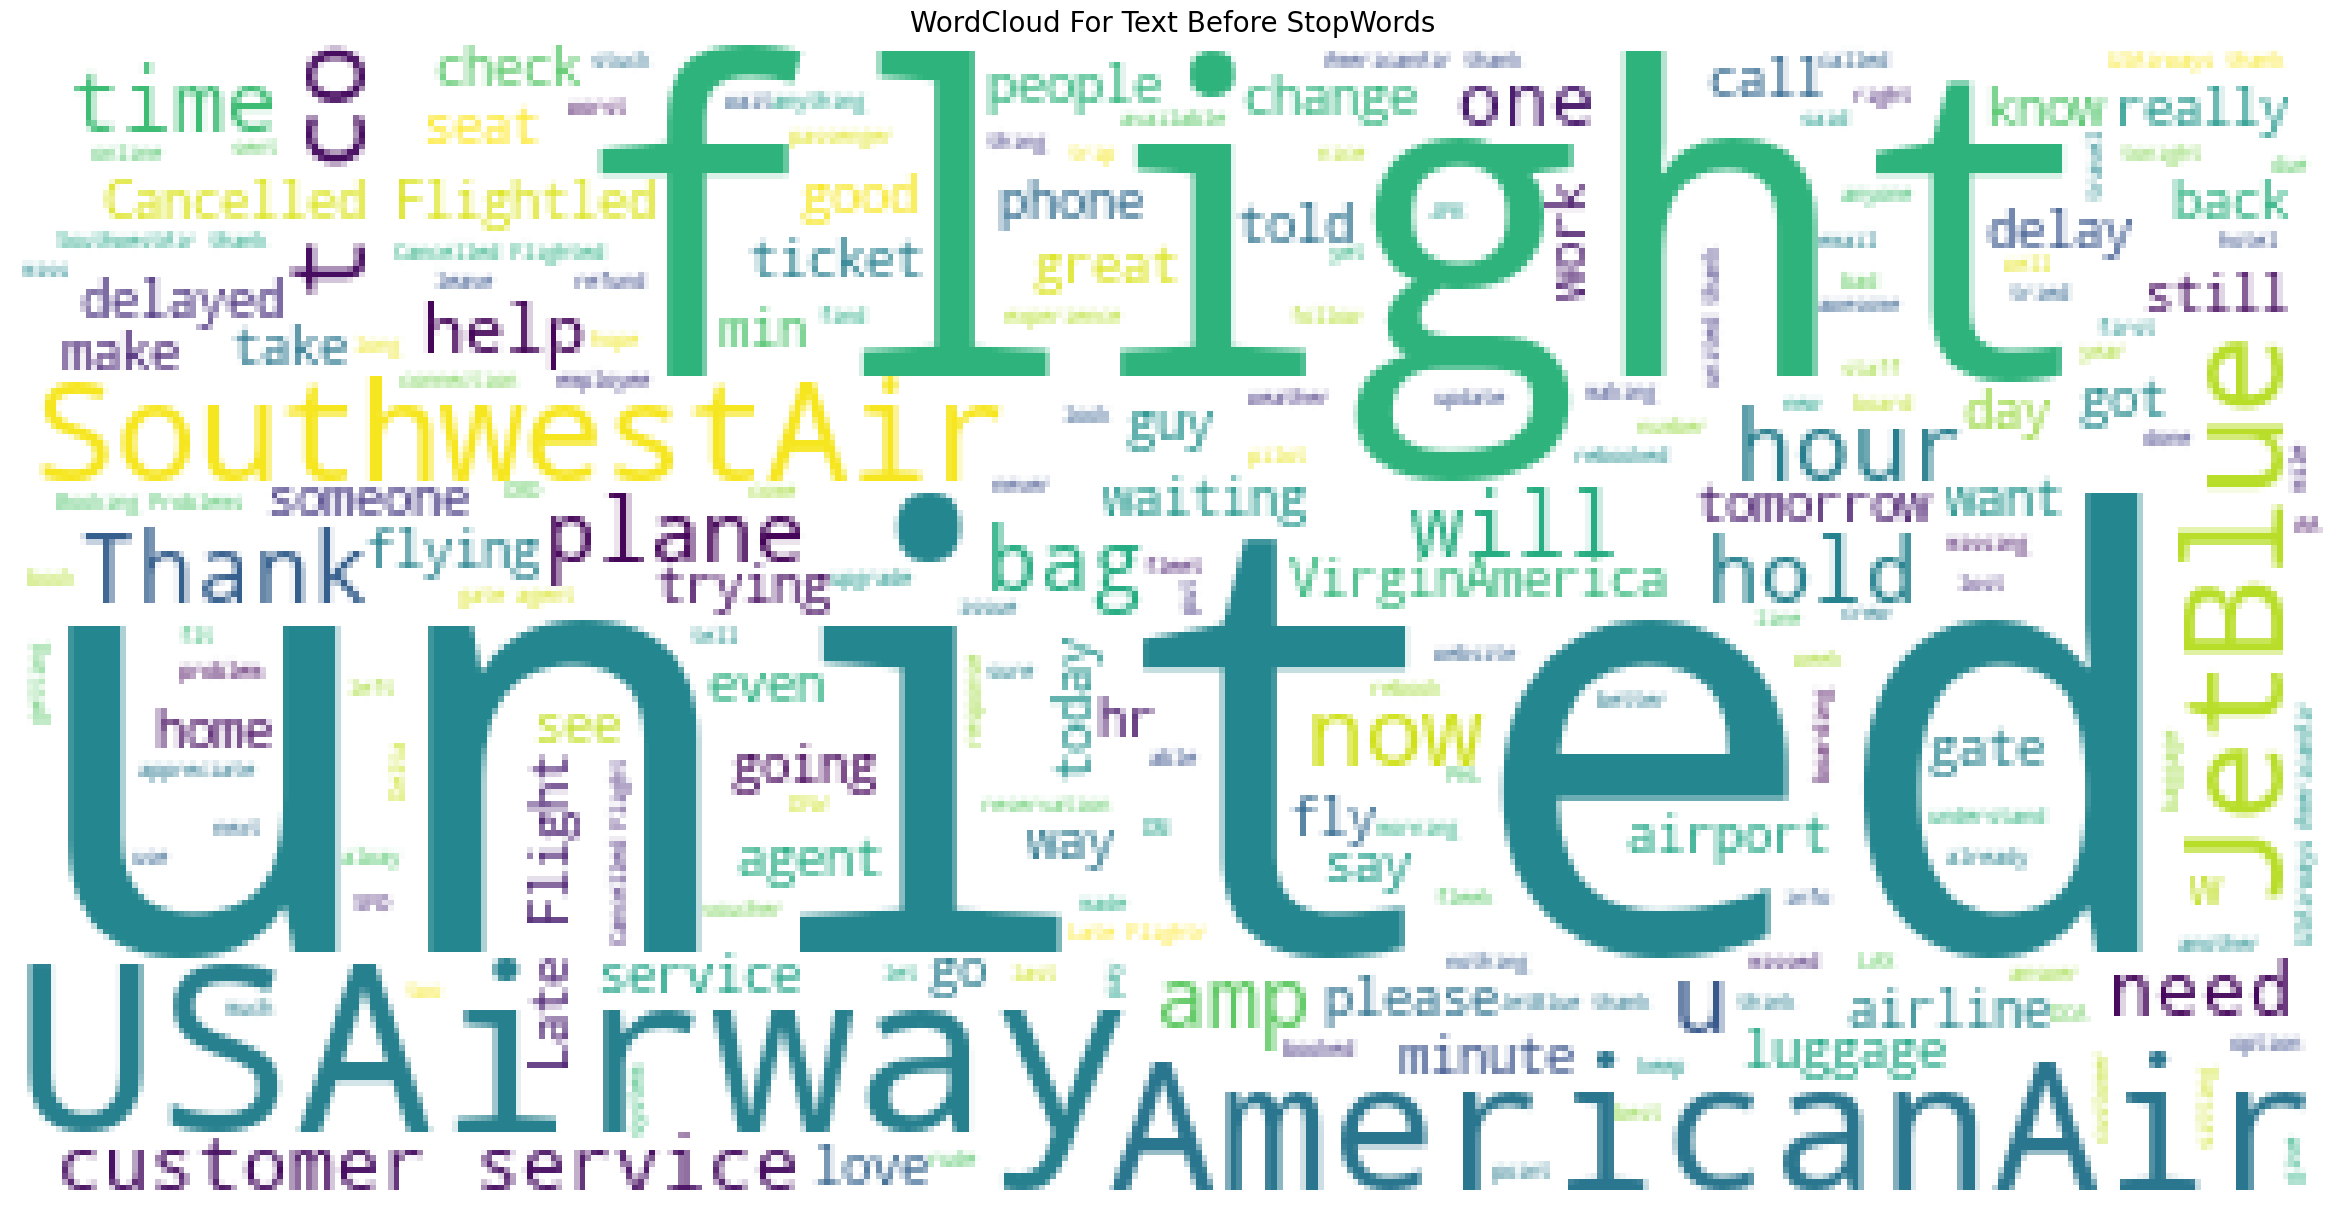

In [10]:
plt.figure(figsize=(30,20))
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(data.text)))
plt.axis("off")
plt.title("WordCloud For Text Before StopWords",fontsize=20)
plt.show()   

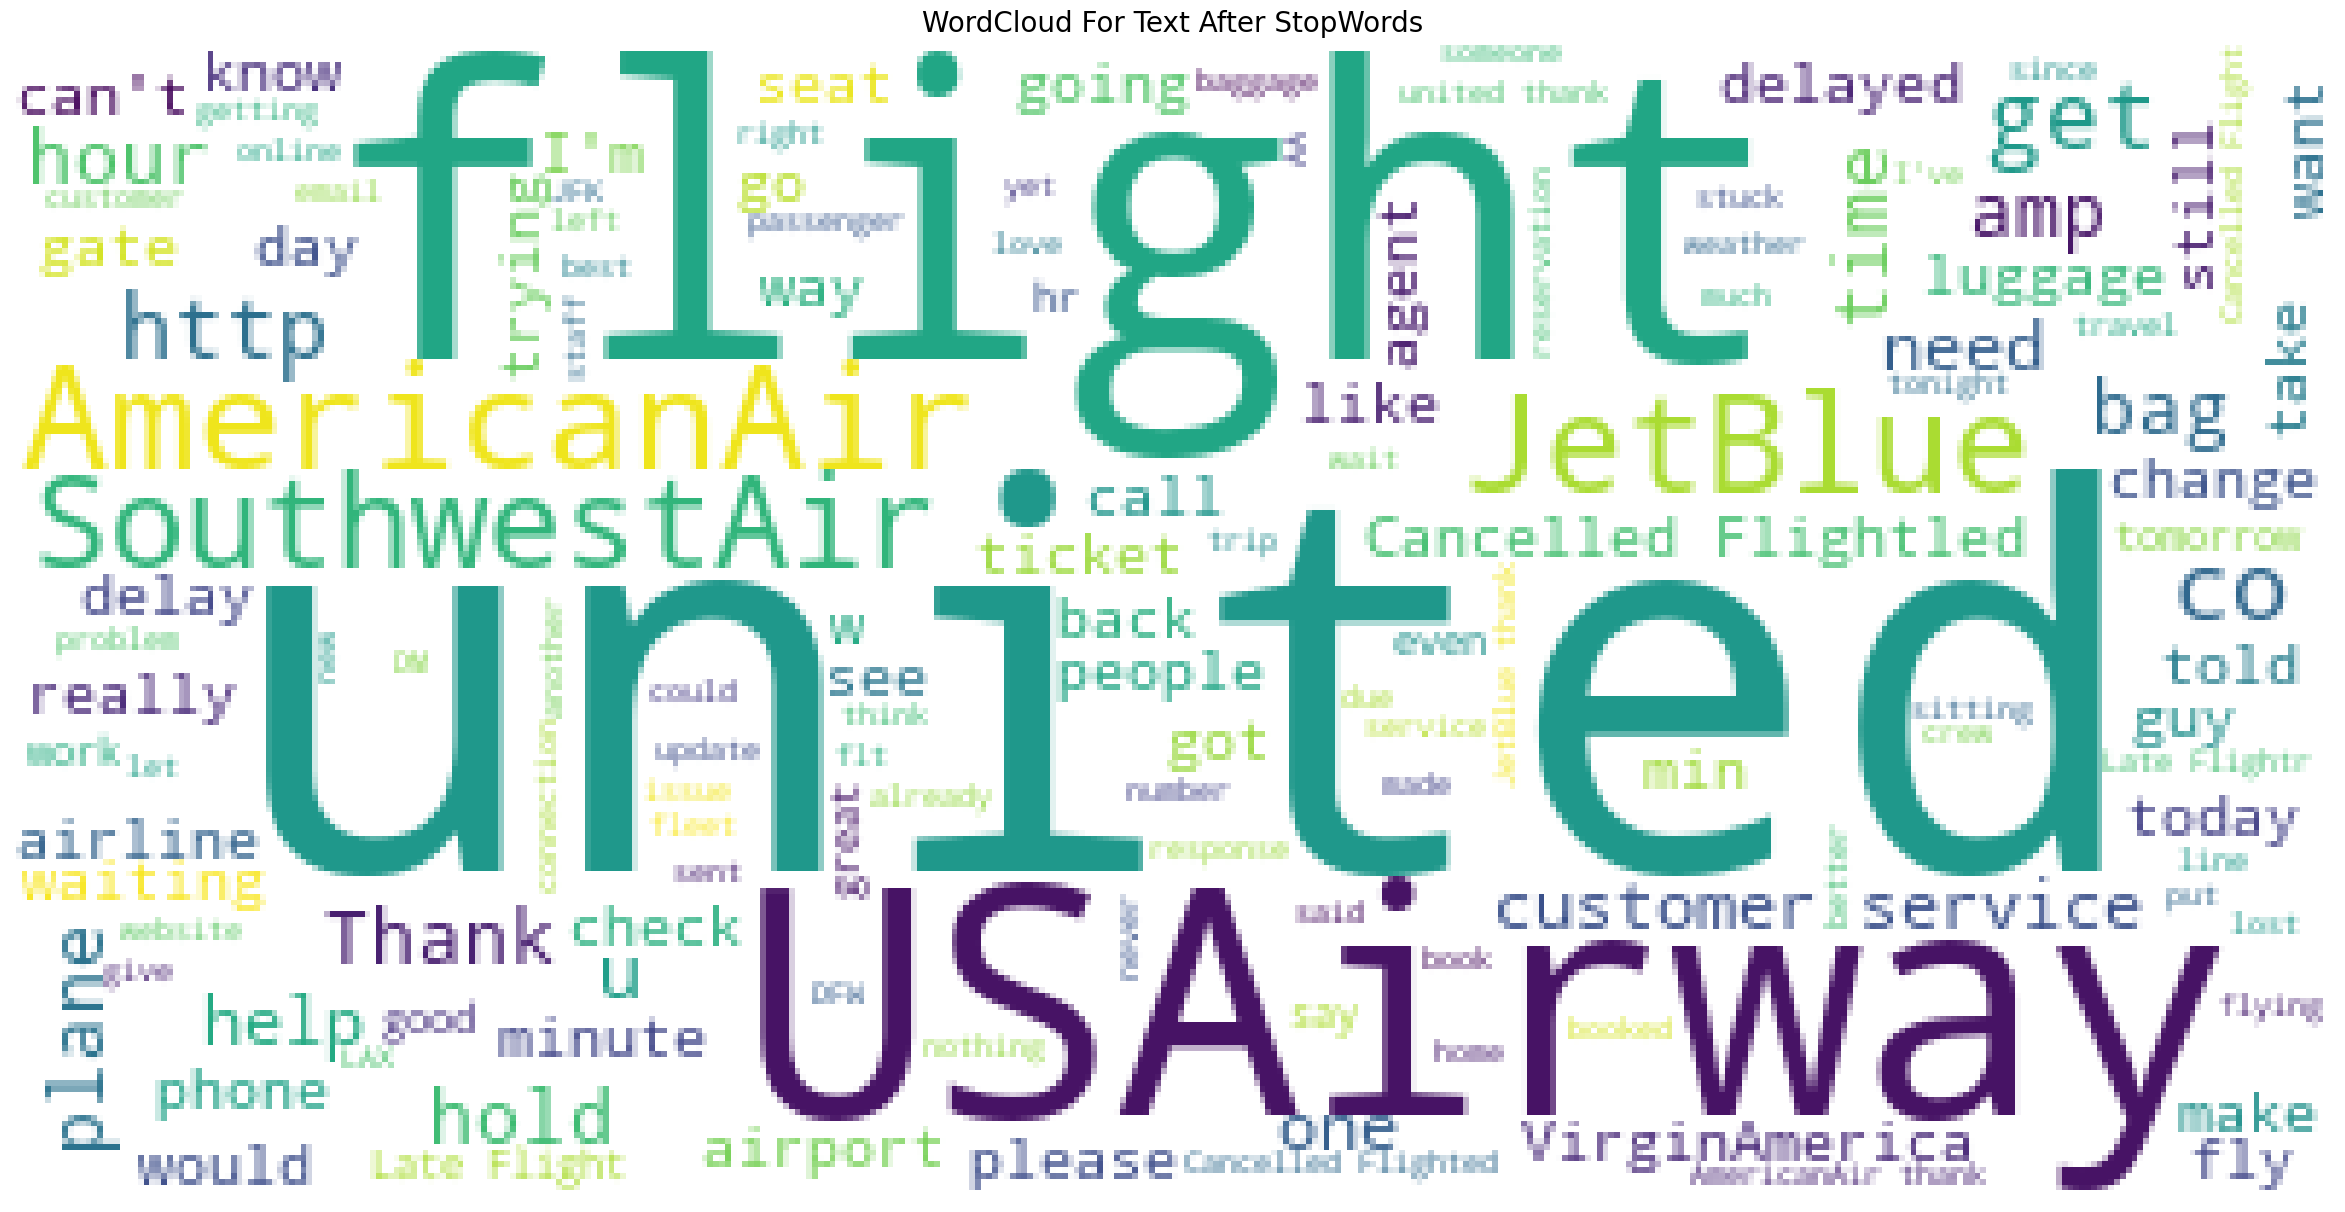

In [11]:
plt.figure(figsize=(30,20))
plt.imshow(WordCloud(background_color = 'white',stopwords=set(stopwords.words('english'))).generate(" ".join(data.text)))
plt.axis("off")
plt.title("WordCloud For Text After StopWords",fontsize=20)
plt.show()  

**Model Building**

In [12]:
#Input
Text=data.text
Text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [13]:
def clean_text(text):
    # Remove Twitter handles starting with '@'
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert the text to lowercase
    text = text.lower()
    return text

In [14]:
Text=Text.apply(clean_text)
Text

0                                                what said
1         plus youve added commercials to the experienc...
2         i didnt today must mean i need to take anothe...
3         its really aggressive to blast obnoxious ente...
4                  and its a really big bad thing about it
                               ...                        
14635     thank you we got on a different flight to chi...
14636     leaving over minutes late flight no warnings ...
14637         please bring american airlines to blackberry
14638     you have my money you change my flight and do...
14639     we have ppl so we need know how many seats ar...
Name: text, Length: 14640, dtype: object

In [15]:
#Output
Target=data.airline_sentiment
Target

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [16]:
#Transform Output
Target.replace('positive',1,inplace=True)
Target.replace('neutral',0,inplace=True)
Target.replace('negative',-1,inplace=True)
Target

0        0
1        1
2        0
3       -1
4       -1
        ..
14635    1
14636   -1
14637    0
14638   -1
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

In [17]:
vectorizer =TfidfVectorizer()
Text= vectorizer.fit_transform(Text)

In [18]:
for feature in np.random.randint(0,len(vectorizer.vocabulary_.keys()),100):
    print(list(vectorizer.vocabulary_.keys())[feature],end=' & ')

paul & watch & ees & froward & panicked & dulles & poker & nrt & davidson & justsayin & httptcoqxvmvug & clewould & hug & none & yourstoryhere & happyflight & timeseverytime & pulls & stopping & elpaso & childish & checkout & expanding & kathryn & ebokeers & mac & buf & ish & unamerican & preboards & aerojobmarket & unsat & contracts & gd & answer & jose & httptcoarvaylmfc & completing & reminding & noise & crowd & doubletriple & benefits & serenitynow & gone & hrmin & awayhere & httptcoeueyxawcv & tallahassee & space & tsaprecheck & fired & values & gangway & customerexperience & httptcohxsnvfbbh & baggageridiculous & rez & colours & qualifies & handling & gardening & bestairlineever & standbylots & overzealous & dislexia & competitor & twa & popular & sec & occurs & nbr & nope & pe & dwell & vmsgyour & allows & crpe & guacamole & marriott & toolittletoolate & plan & betch & rr & surely & radio & httptcoztkeeup & anotherfail & par & httptcosctomh & relevant & birder & anymore & outbou

In [19]:
smote=SMOTE()
Text,Target=smote.fit_resample(Text,Target)

In [20]:
#Split Data
X_train,X_test,y_train,y_test=train_test_split(Text,Target,test_size=.15,shuffle=True,random_state=44)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (23403, 13709)
X_test Shape : (4131, 13709)
y_train Shape : (23403,)
y_test Shape : (4131,)


In [21]:
#Model
model=Pipeline([
    #('tfid',TfidfVectorizer()),
    ('model',RandomForestClassifier(criterion = 'gini',n_estimators=400,max_depth=600,random_state=44))
    ])
model.fit(X_train,y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=600, n_estimators=400,
                                        random_state=44))])

**Model Check**

In [22]:
print('Pipeline Model Train Score is : ' , model.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , model.score(X_test, y_test))

Pipeline Model Train Score is :  0.9974362261248558
Pipeline Model Test Score is :  0.9150326797385621


In [23]:
y_pred=model.predict(X_test)

In [24]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
18140,0,0
19943,0,0
22439,1,1
3479,1,1
16949,0,0
...,...,...
8375,-1,-1
22789,1,1
4877,0,0
15555,0,0


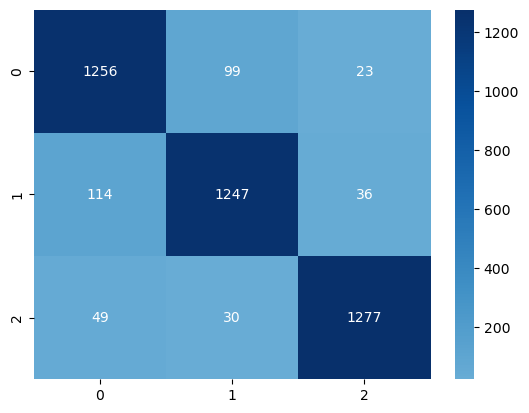

array([[1256,   99,   23],
       [ 114, 1247,   36],
       [  49,   30, 1277]], dtype=int64)

In [25]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues')
plt.show()
CM

In [26]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          -1       0.89      0.91      0.90      1378
           0       0.91      0.89      0.90      1397
           1       0.96      0.94      0.95      1356

    accuracy                           0.92      4131
   macro avg       0.92      0.92      0.92      4131
weighted avg       0.92      0.92      0.92      4131



**Save Model**

In [27]:
pk.dump(model , open('model.sav','wb'))

In [28]:
saved_model=pk.load(open('model.sav','rb'))

**SentimentIntensityAnalyzer**

In [29]:
data2=data.copy()
sen=SentimentIntensityAnalyzer()
data2['score'] =(data2.text.apply(clean_text)).apply(lambda text: sen.polarity_scores(text))
data2.head()

,airline_sentiment,text,score
0,0,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,0,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,-1,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.236, 'neu': 0.628, 'pos': 0.135, 'co..."
4,-1,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp..."


In [30]:
data2['compound'] = data2['score'].apply(lambda score_dict: score_dict['compound'])
data2.head()

,airline_sentiment,text,score,compound
0,0,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,1,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,0,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,-1,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.236, 'neu': 0.628, 'pos': 0.135, 'co...",-0.2716
4,-1,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",-0.5829


In [31]:
data2['comp_score'] = data2['compound'].apply(lambda c: 1 if c > 0 else -1 if c < 0 else 0)
data2.head()

,airline_sentiment,text,score,compound,comp_score
0,0,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
1,1,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
2,0,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
3,-1,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.236, 'neu': 0.628, 'pos': 0.135, 'co...",-0.2716,-1
4,-1,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",-0.5829,-1


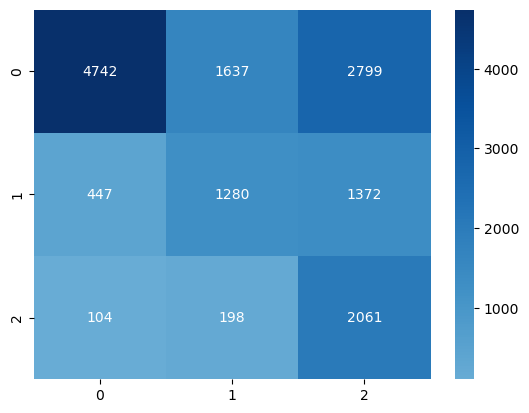

array([[4742, 1637, 2799],
       [ 447, 1280, 1372],
       [ 104,  198, 2061]], dtype=int64)

In [32]:
CM = confusion_matrix(data2.airline_sentiment,data2.comp_score)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues')
plt.show()
CM

In [33]:
ClassificationReport = classification_report(data2.airline_sentiment,data2.comp_score)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          -1       0.90      0.52      0.66      9178
           0       0.41      0.41      0.41      3099
           1       0.33      0.87      0.48      2363

    accuracy                           0.55     14640
   macro avg       0.55      0.60      0.52     14640
weighted avg       0.70      0.55      0.58     14640



Use Model

In [34]:
y_pred=model.predict(vectorizer.transform(data2.text.apply(clean_text)))

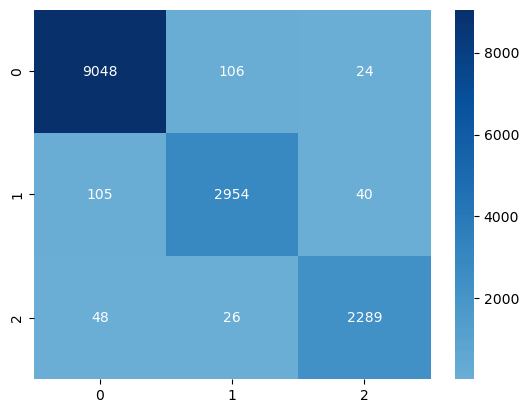

array([[9048,  106,   24],
       [ 105, 2954,   40],
       [  48,   26, 2289]], dtype=int64)

In [35]:
CM = confusion_matrix(data2.airline_sentiment, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues')
plt.show()
CM

In [36]:
ClassificationReport = classification_report(data2.airline_sentiment,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          -1       0.98      0.99      0.98      9178
           0       0.96      0.95      0.96      3099
           1       0.97      0.97      0.97      2363

    accuracy                           0.98     14640
   macro avg       0.97      0.97      0.97     14640
weighted avg       0.98      0.98      0.98     14640

